In [1]:
import pandas as pd
from pycaret.classification import * 

In [2]:
from pycaret.datasets import get_data
juice=get_data('juice')

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [3]:
import lightgbm as lgb
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# لود دیتاست
from pycaret.datasets import get_data
juice = get_data('juice')

# تبدیل Purchase به عددی
le = LabelEncoder()
juice['Purchase'] = le.fit_transform(juice['Purchase'])

# تبدیل Store7 به category یا عددی
juice['Store7'] = juice['Store7'].astype('category')

# جدا کردن ویژگی‌ها و هدف
X_train = juice.drop('Purchase', axis=1)
y_train = juice['Purchase']

# چک کردن نوع داده‌ها برای اطمینان
print(X_train.dtypes)

# ایجاد دیتاست LightGBM
train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=['Store7'])

# تنظیمات مدل
params = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'min_data_in_leaf': 10,
    'min_sum_hessian_in_leaf': 0.001,
    'max_depth': -1
}

# آموزش مدل
model = lgb.train(params, train_data, num_boost_round=100)

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


Id                   int64
WeekofPurchase       int64
StoreID              int64
PriceCH            float64
PriceMM            float64
DiscCH             float64
DiscMM             float64
SpecialCH            int64
SpecialMM            int64
LoyalCH            float64
SalePriceMM        float64
SalePriceCH        float64
PriceDiff          float64
Store7            category
PctDiscMM          float64
PctDiscCH          float64
ListPriceDiff      float64
STORE                int64
dtype: object
[LightGBM] [Info] Number of positive: 417, number of negative: 653
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000287 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 739
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.389720 -> initscore=-0.448491
[L

In [4]:
clf=setup(data=juice ,target='Purchase')

,Description,Value
0,Session id,1163
1,Target,Purchase
2,Target type,Binary
3,Original data shape,"(1070, 19)"
4,Transformed data shape,"(1070, 19)"
5,Transformed train set shape,"(749, 19)"
6,Transformed test set shape,"(321, 19)"
7,Numeric features,17
8,Categorical features,1
9,Preprocess,True


In [5]:
com=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8411,0.9054,0.7914,0.8049,0.7945,0.6655,0.6692,0.0090
lr,Logistic Regression,0.8371,0.9052,0.7743,0.8087,0.7871,0.6560,0.6601,0.4430
gbc,Gradient Boosting Classifier,0.8371,0.8998,0.7878,0.7961,0.7896,0.6571,0.6596,0.0260
lda,Linear Discriminant Analysis,0.8371,0.9040,0.7913,0.7960,0.7915,0.6583,0.6604,0.0090
xgboost,Extreme Gradient Boosting,0.8224,0.8791,0.7603,0.7857,0.7695,0.6255,0.6293,0.2220
lightgbm,Light Gradient Boosting Machine,0.8198,0.8794,0.7603,0.7785,0.7660,0.6200,0.6234,0.1380
rf,Random Forest Classifier,0.8171,0.8883,0.7534,0.7771,0.7615,0.6137,0.6175,0.0360
ada,Ada Boost Classifier,0.8078,0.8617,0.7299,0.7681,0.7455,0.5919,0.5950,0.0200
et,Extra Trees Classifier,0.7997,0.8665,0.7332,0.7509,0.7393,0.5773,0.5799,0.0290
dt,Decision Tree Classifier,0.7744,0.7659,0.7262,0.7103,0.7144,0.5287,0.5326,0.0080


In [6]:
top_3=compare_models(n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8411,0.9054,0.7914,0.8049,0.7945,0.6655,0.6692,0.0080
lr,Logistic Regression,0.8371,0.9052,0.7743,0.8087,0.7871,0.6560,0.6601,0.0210
gbc,Gradient Boosting Classifier,0.8371,0.8998,0.7878,0.7961,0.7896,0.6571,0.6596,0.0280
lda,Linear Discriminant Analysis,0.8371,0.9040,0.7913,0.7960,0.7915,0.6583,0.6604,0.0090
catboost,CatBoost Classifier,0.8305,0.9018,0.7775,0.7900,0.7806,0.6429,0.6461,0.3170
xgboost,Extreme Gradient Boosting,0.8224,0.8791,0.7603,0.7857,0.7695,0.6255,0.6293,0.0140
lightgbm,Light Gradient Boosting Machine,0.8198,0.8794,0.7603,0.7785,0.7660,0.6200,0.6234,0.1510
rf,Random Forest Classifier,0.8171,0.8883,0.7534,0.7771,0.7615,0.6137,0.6175,0.0330
ada,Ada Boost Classifier,0.8078,0.8617,0.7299,0.7681,0.7455,0.5919,0.5950,0.0170
et,Extra Trees Classifier,0.7997,0.8665,0.7332,0.7509,0.7393,0.5773,0.5799,0.0260


In [7]:
top_3

[RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                 max_iter=None, positive=False, random_state=1163, solver='auto',
                 tol=0.0001),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=1163, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='log_loss', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=100, n_iter_no_change=None,
                           

In [8]:
lda_model=create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8533,0.8868,0.8276,0.8000,0.8136,0.6927,0.6930
1,0.7200,0.8441,0.7241,0.6176,0.6667,0.4279,0.4319
2,0.8533,0.9198,0.8276,0.8000,0.8136,0.6927,0.6930
3,0.8667,0.9303,0.8276,0.8276,0.8276,0.7189,0.7189
4,0.8133,0.9153,0.7931,0.7419,0.7667,0.6114,0.6123
5,0.7867,0.8801,0.7241,0.7241,0.7241,0.5502,0.5502
6,0.9067,0.9438,0.8966,0.8667,0.8814,0.8045,0.8048
7,0.8933,0.9356,0.8667,0.8667,0.8667,0.7778,0.7778
8,0.8267,0.8837,0.6667,0.8696,0.7547,0.6243,0.6375


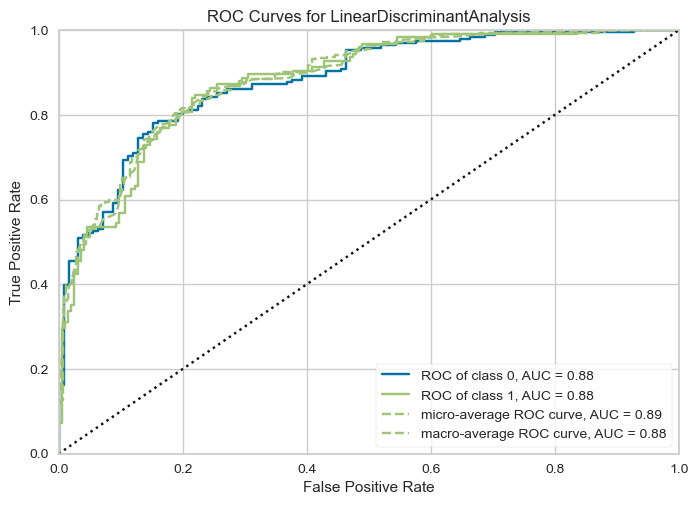

In [9]:
plot_model(estimator=lda_model,plot='auc')

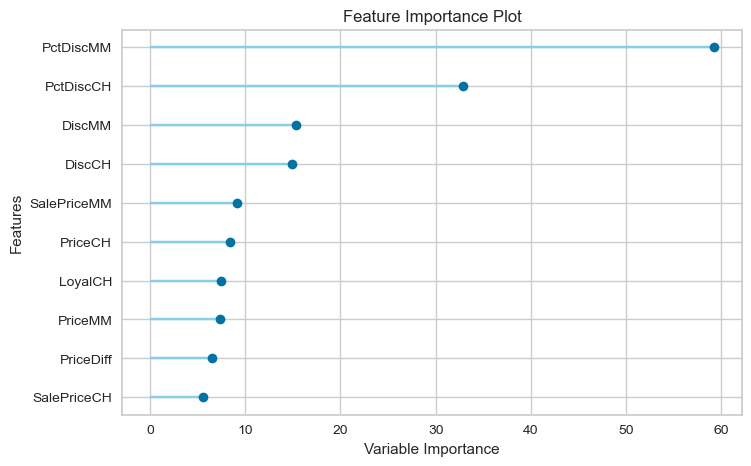

In [10]:
plot_model(estimator=lda_model,plot='feature')

In [11]:
rd = create_model('ridge');      
lgm  = create_model('lightgbm');            

#blending 3 models
blend = blend_models(estimator_list=[lgm,lda_model,rd])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8533,0.8838,0.8276,0.8000,0.8136,0.6927,0.6930
1,0.7867,0.8703,0.8276,0.6857,0.7500,0.5668,0.5744
2,0.8533,0.9145,0.8276,0.8000,0.8136,0.6927,0.6930
3,0.8400,0.9318,0.7586,0.8148,0.7857,0.6583,0.6594
4,0.8133,0.9168,0.7931,0.7419,0.7667,0.6114,0.6123
5,0.8000,0.8808,0.7241,0.7500,0.7368,0.5756,0.5759
6,0.8933,0.9385,0.8966,0.8387,0.8667,0.7779,0.7791
7,0.8933,0.9333,0.8667,0.8667,0.8667,0.7778,0.7778
8,0.8267,0.8822,0.6333,0.9048,0.7451,0.6199,0.6425


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8133,0.8478,0.7586,0.7586,0.7586,0.6064,0.6064
1,0.7067,0.7969,0.6897,0.6061,0.6452,0.3969,0.3993
2,0.8667,0.9130,0.7931,0.8519,0.8214,0.7153,0.7164
3,0.8400,0.9010,0.7586,0.8148,0.7857,0.6583,0.6594
4,0.8267,0.8898,0.8621,0.7353,0.7937,0.6458,0.6519
5,0.7467,0.8636,0.6207,0.6923,0.6545,0.4555,0.4572
6,0.9067,0.9213,0.8966,0.8667,0.8814,0.8045,0.8048
7,0.8533,0.9296,0.8667,0.7879,0.8254,0.6995,0.7018
8,0.8133,0.8593,0.6333,0.8636,0.7308,0.5930,0.6097


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8400,0.0000,0.8276,0.7742,0.8000,0.6669,0.6679
1,0.7333,0.0000,0.7586,0.6286,0.6875,0.4585,0.4647
2,0.8533,0.0000,0.8276,0.8000,0.8136,0.6927,0.6930
3,0.8667,0.0000,0.8276,0.8276,0.8276,0.7189,0.7189
4,0.8267,0.0000,0.8276,0.7500,0.7869,0.6414,0.6436
5,0.7867,0.0000,0.7241,0.7241,0.7241,0.5502,0.5502
6,0.9067,0.0000,0.8966,0.8667,0.8814,0.8045,0.8048
7,0.8933,0.0000,0.8667,0.8667,0.8667,0.7778,0.7778
8,0.8400,0.0000,0.6667,0.9091,0.7692,0.6512,0.6695


In [14]:
from pycaret.classification import *

# راه‌اندازی محیط PyCaret
clf = setup(data=juice, target='Purchase', categorical_features=['Store7'], verbose=False)

# فرض می‌کنیم lda_model قبلاً تعریف شده
# بهینه‌سازی آستانه با متریک Accuracy
optimized_model = optimize_threshold(lda_model, optimize='Accuracy')


Threshold: 0.0. Accuracy: 0.3899
Threshold: 0.5. Accuracy: 0.8318
Threshold: 0.75. Accuracy: 0.7877
Threshold: 0.25. Accuracy: 0.7997
Threshold: 0.375. Accuracy: 0.8197
Threshold: 0.875. Accuracy: 0.7583
Threshold: 0.625. Accuracy: 0.8304
Threshold: 0.125. Accuracy: 0.7317
Threshold: 0.09375. Accuracy: 0.709
Threshold: 0.59375. Accuracy: 0.8277
Threshold: 0.84375. Accuracy: 0.781
Threshold: 0.34375. Accuracy: 0.825
Threshold: 0.46875. Accuracy: 0.8331
Threshold: 0.96875. Accuracy: 0.6489
Threshold: 0.71875. Accuracy: 0.7983
Threshold: 0.21875. Accuracy: 0.7837
Threshold: 0.234375. Accuracy: 0.7957
Threshold: 0.734375. Accuracy: 0.7917
Threshold: 0.984375. Accuracy: 0.6221
Threshold: 0.484375. Accuracy: 0.8372
Threshold: 0.359375. Accuracy: 0.8224
Threshold: 0.859375. Accuracy: 0.7716
Threshold: 0.609375. Accuracy: 0.8291
Threshold: 0.109375. Accuracy: 0.725
Threshold: 0.078125. Accuracy: 0.6877
Threshold: 0.578125. Accuracy: 0.8264
Threshold: 0.828125. Accuracy: 0.7863
Threshold: 0.328

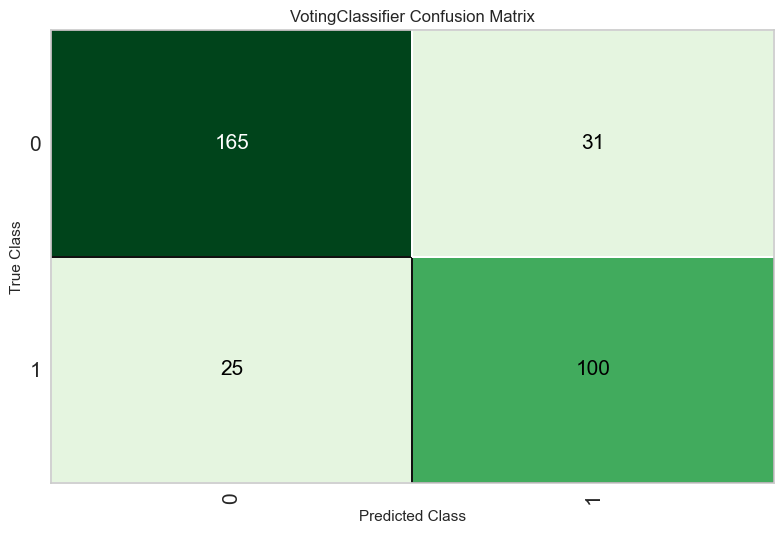

In [15]:
plot_model(estimator=blend,plot='confusion_matrix')

In [16]:
pred=predict_model(blend)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.8255,0.8209,0.8000,0.7634,0.7812,0.6363,0.6368


In [17]:
evaluate_model(lda_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…